In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


Text(0, 0.5, 'Placement_exam_marks')

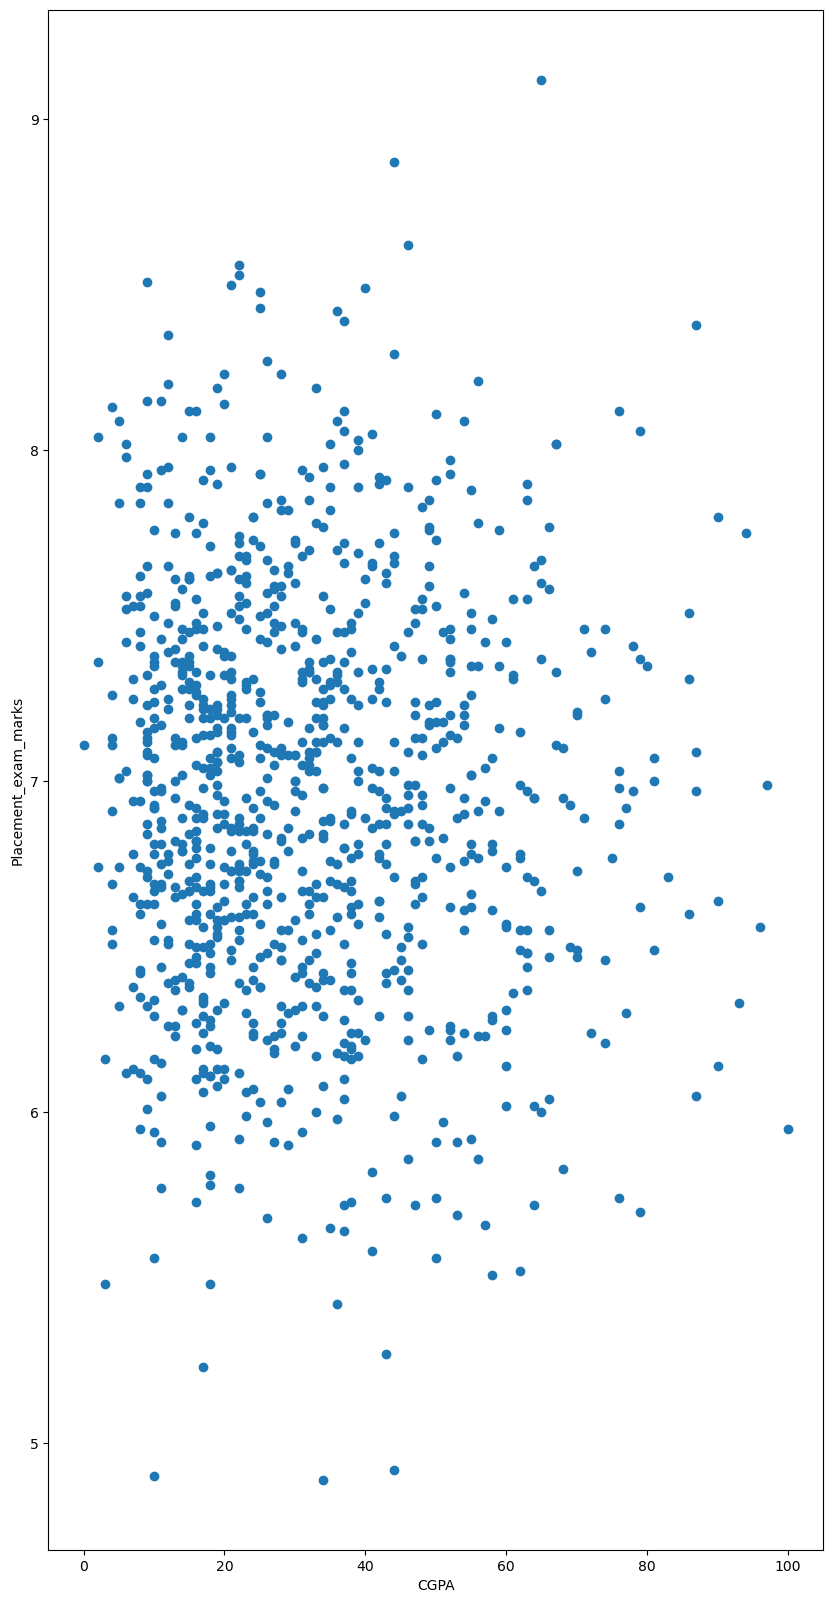

In [10]:
#plt.figure(figzsize=(20, 10))
plt.figure(figsize=(20, 10))
plt.scatter(df['placement_exam_marks'], df['cgpa'])
plt.xlabel('CGPA')
plt.ylabel('Placement_exam_marks')

In [41]:
corr_matrix = df.corr()
print(corr_matrix['cgpa'])

cgpa                    1.000000
placement_exam_marks   -0.027371
placed                  0.027212
Name: cgpa, dtype: float64


In [10]:
x = df.iloc[:, 0:1]
y = df.iloc[:,1]


0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 1000, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
lm.predict(X_test.iloc[0].values.reshape(-1, 1))

/home/devid/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32.51315053])

In [20]:
X_test.iloc[0]

cgpa    7.45
Name: 841, dtype: float64

In [35]:
predictii = lm.predict(X_train)
predictii.reshape(-1, 1)
X_train_1d = np.array(X_train).flatten()
print(X_train_1d.shape)
print(predictii.shape)

(800,)
(800,)


In [37]:
w = lm.coef_

b = lm.intercept_

print(f'w = {w}')
print(f'b = {b}')

w = [0.02960636]
b = 32.29258316917266


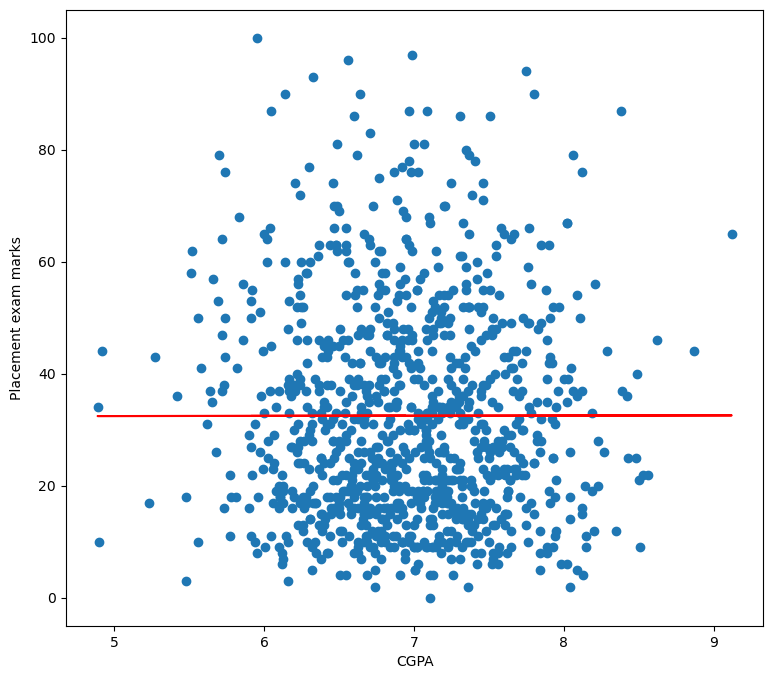

In [39]:
plt.figure(figsize=(9,8))
plt.scatter(df['cgpa'], df['placement_exam_marks'])
plt.plot(X_train_1d, predictii, color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Placement exam marks')
plt.show()